In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f_image = cv.imread("captures/set0/front.JPG", cv.IMREAD_GRAYSCALE)
l_image = cv.imread("captures/set0/left.JPG", cv.IMREAD_GRAYSCALE)
r_image = cv.imread("captures/set0/right.JPG", cv.IMREAD_GRAYSCALE)

In [3]:
orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(f_image, None)
kp2, des2 = orb.detectAndCompute(r_image, None)
kp3, des3 = orb.detectAndCompute(l_image, None)

In [4]:
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors between img1 and img2
matches12 = bf.match(des1, des2)
matches12 = sorted(matches12, key=lambda x: x.distance)

# Match descriptors between img1 and img3
matches13 = bf.match(des1, des3)
matches13 = sorted(matches13, key=lambda x: x.distance)

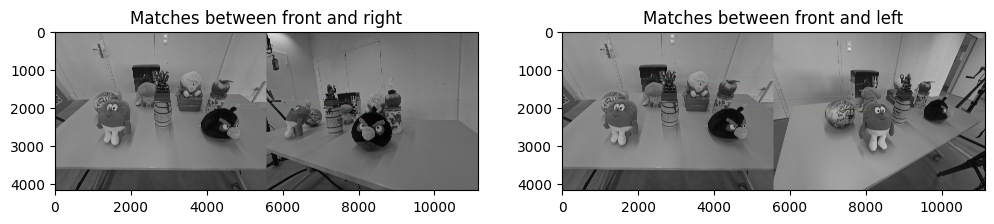

In [5]:
img_matches12 = cv.drawMatches(f_image, kp1, r_image, kp2, matches12[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches13 = cv.drawMatches(f_image, kp1, l_image, kp3, matches13[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Matches between front and right")
plt.imshow(img_matches12)
plt.subplot(1, 2, 2)
plt.title("Matches between front and left")
plt.imshow(img_matches13)
plt.show()